# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Restaurant Visitors

In [2]:
rest = pd.read_csv(r'F:\Class Material\Time_Series\RestaurantVisitors.csv',index_col='date', parse_dates=True )

In [3]:
rest.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [4]:
rest

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [7]:
rest.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [8]:
rest = rest.dropna()

In [9]:
rest.shape

(478, 8)

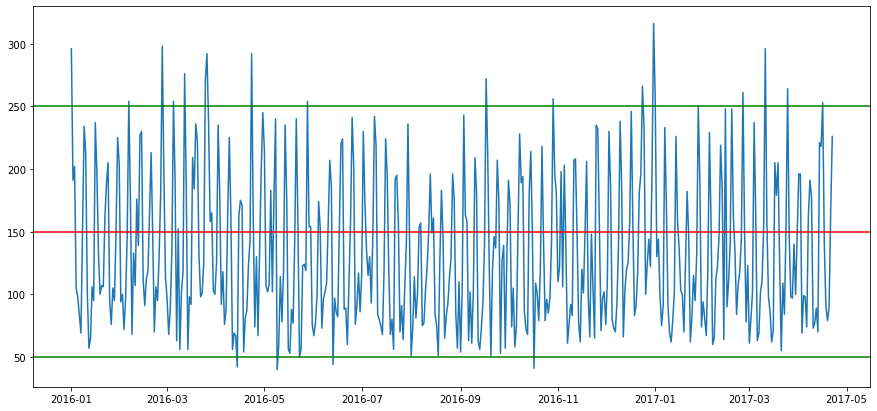

In [10]:
plt.figure(figsize = (15,7))
plt.plot(rest.total)
plt.axhline(y =150 ,color = 'r')
plt.axhline(y =50 ,color = 'g')
plt.axhline(y =250 ,color = 'g')

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
rest_seasonal = seasonal_decompose(rest.total)

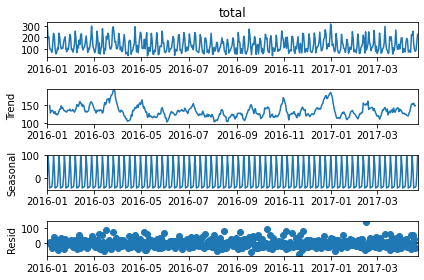

In [13]:
rest_seasonal.plot()
plt.show()

### From the above graph we can see that

###### 1) Data is SEASONAL in period of 7 Days
###### 2) Data is STATIONARY
###### 3) There is NO TREND in data

In [14]:
ho_index = rest[rest.holiday ==1].index
ho_index     
# SELECTING THE DATES ON WHICH THERE IS HOLIDAYS

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

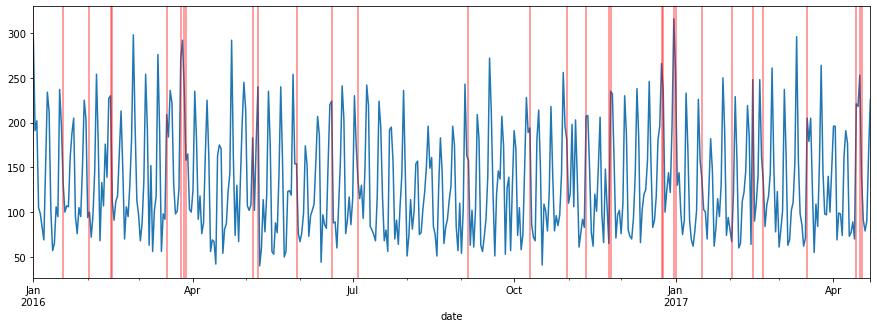

In [15]:
ax = rest['total'].plot(figsize = (15,5))
for day in ho_index:
    ax.axvline(x = day , color = 'red', alpha = .5)

##### this graph is to show that holidays are impacting the number of people visiting restaurant , normally with holidays there is sudden increase ,So SARIMA model may not be sufficient so we have to use SARIMAX as there is external factor affecting our data

In [16]:
import pmdarima
from pmdarima import auto_arima

In [17]:
auto_arima(rest['total'], seasonal=True , m=7 , maxiter =50)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [18]:
rest_train = rest.iloc[0:450]
rest_test  = rest.iloc[450::]       
# Dividing data into train and test sets

## Model Creation

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
modelsarima_rest =SARIMAX(rest_train.total , order=(0, 0, 0),seasonal_order=(1, 0, 1, 7))

In [23]:
result=modelsarima_rest.fit()

In [24]:
pred = result.predict(start=450 , end=477) 
#PREDICTION ARE MADE ON TEST DATA

In [25]:
pred

2017-03-26    174.189917
2017-03-27     90.608807
2017-03-28     95.760035
2017-03-29     95.480202
2017-03-30     96.688471
2017-03-31    145.285825
2017-04-01    232.775443
2017-04-02    174.178962
2017-04-03     90.603109
2017-04-04     95.754012
2017-04-05     95.474197
2017-04-06     96.682390
2017-04-07    145.276688
2017-04-08    232.760804
2017-04-09    174.168007
2017-04-10     90.597411
2017-04-11     95.747990
2017-04-12     95.468193
2017-04-13     96.676310
2017-04-14    145.267551
2017-04-15    232.746166
2017-04-16    174.157054
2017-04-17     90.591713
2017-04-18     95.741968
2017-04-19     95.462189
2017-04-20     96.670230
2017-04-21    145.258415
2017-04-22    232.731528
Freq: D, Name: predicted_mean, dtype: float64

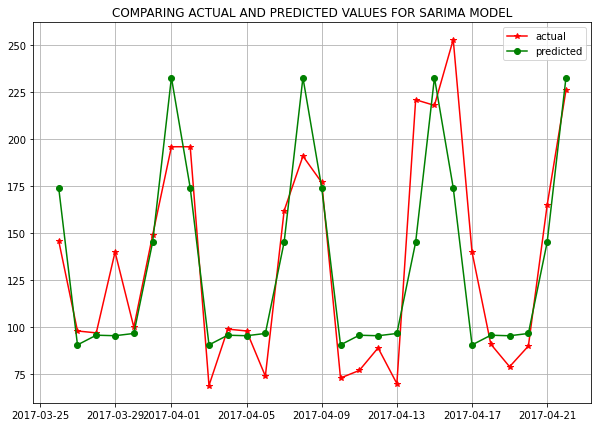

In [26]:
plt.figure(figsize = (10,7))
plt.plot(rest_test['total'] , color = 'r',marker = '*',label = 'actual')
plt.plot(pred , color = 'g' , marker = 'o' , label = 'predicted')
plt.title('COMPARING ACTUAL AND PREDICTED VALUES FOR SARIMA MODEL')
plt.grid()
plt.legend()

In [27]:
df = pd.DataFrame()
df['actual'] =rest_test['total']
df['predicted'] = pred
df['error'] = df.actual - df.predicted
df['%diff'] = np.abs(df.error)*100/df.actual

In [28]:
df

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,174.189917,-28.189917,19.308162
2017-03-27,98.0,90.608807,7.391193,7.542034
2017-03-28,97.0,95.760035,1.239965,1.278315
2017-03-29,140.0,95.480202,44.519798,31.799856
2017-03-30,100.0,96.688471,3.311529,3.311529
2017-03-31,149.0,145.285825,3.714175,2.492735
2017-04-01,196.0,232.775443,-36.775443,18.762981
2017-04-02,196.0,174.178962,21.821038,11.133183
2017-04-03,69.0,90.603109,-21.603109,31.308853


In [29]:
MSE = np.mean(np.square(df.error))
MSE 

875.4944794809901

In [30]:
MAPE = np.mean(df['%diff'])
MAPE

15.962664716967627

In [31]:
rest_test[rest_test.holiday ==1 ]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-14,Friday,1,Good Friday,41.0,74.0,57.0,49.0,221.0
2017-04-16,Sunday,1,Easter,58.0,35.0,60.0,100.0,253.0
2017-04-17,Monday,1,Easter Monday,63.0,21.0,24.0,32.0,140.0


In [32]:
df[df['%diff']>15]

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,174.189917,-28.189917,19.308162
2017-03-29,140.0,95.480202,44.519798,31.799856
2017-04-01,196.0,232.775443,-36.775443,18.762981
2017-04-03,69.0,90.603109,-21.603109,31.308853
2017-04-06,74.0,96.682390,-22.682390,30.651879
2017-04-08,191.0,232.760804,-41.760804,21.864295
2017-04-10,73.0,90.597411,-17.597411,24.106042
2017-04-11,77.0,95.747990,-18.747990,24.348039
2017-04-13,70.0,96.676310,-26.676310,38.109014


##### model is not doing good for holidays
##### It is doing under prediction
###### TO OVERCOME THIS PROBLEM WE WILL USE SARIMAX

In [34]:
model2 = SARIMAX(rest_train['total'], order = (0,0,0),seasonal_order=(1,0,1,7),exog = rest_train[['holiday']])

In [35]:
result2 = model2.fit()

In [36]:
predict2 = result2.predict(start = 450 , end =477 ,exog =rest_test[['holiday']])

In [37]:
df2 = pd.DataFrame()
df2['actual'] =rest_test['total']
df2['predicted'] = round(predict2)
df2['error'] = df2.actual - df2.predicted
df2['%diff'] = np.abs(df2.error)*100/df2.actual

In [38]:
MSE = np.mean(np.square(df2.error))
MSE 

349.7142857142857

In [39]:
MAPE = np.mean(df2['%diff'])
MAPE

12.071725398786777

In [42]:
df2

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,169.0,-23.0,15.753425
2017-03-27,98.0,80.0,18.0,18.367347
2017-03-28,97.0,93.0,4.0,4.123711
2017-03-29,140.0,95.0,45.0,32.142857
2017-03-30,100.0,92.0,8.0,8.000000
2017-03-31,149.0,139.0,10.0,6.711409
2017-04-01,196.0,229.0,-33.0,16.836735
2017-04-02,196.0,169.0,27.0,13.775510
2017-04-03,69.0,80.0,-11.0,15.942029


In [41]:
df2[df2['%diff']>15]

,actual,predicted,error,%diff
date,,,,
2017-03-26,146.0,169.0,-23.0,15.753425
2017-03-27,98.0,80.0,18.0,18.367347
2017-03-29,140.0,95.0,45.0,32.142857
2017-04-01,196.0,229.0,-33.0,16.836735
2017-04-03,69.0,80.0,-11.0,15.942029
2017-04-06,74.0,92.0,-18.0,24.324324
2017-04-08,191.0,229.0,-38.0,19.895288
2017-04-11,77.0,93.0,-16.0,20.779221
2017-04-13,70.0,92.0,-22.0,31.428571


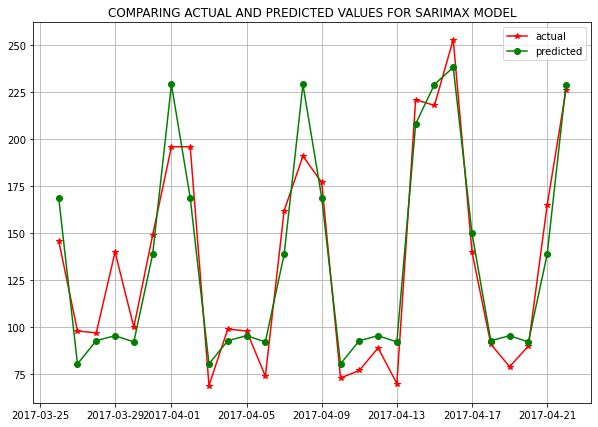

In [43]:
plt.figure(figsize = (10,7))
plt.plot(rest_test['total'] , color = 'r',marker = '*',label = 'actual')
plt.plot(predict2 , color = 'g' , marker = 'o' , label = 'predicted')
plt.title('COMPARING ACTUAL AND PREDICTED VALUES FOR SARIMAX MODEL')
plt.grid()
plt.legend()

## Conclusion :

### We can utilize this model to predict the number of customers who will visit the restaurant with an accuracy rate of approximately 88%. This will assist restaurant owners in staying alert and enhancing their performance and profitability. By utilizing these insights, one can make crucial business decisions and keep ahead of the competition.